In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir_path = "/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/Google Trends/gt v2/"
filelist =[]
for file in os.listdir(dir_path):
    if file.endswith("_v2.csv"):
        filelist.append(dir_path + file)
filelist

['/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/Google Trends/gt v2/bitcoin_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/Google Trends/gt v2/Sell_Bitcoin_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/Google Trends/gt v2/covid_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/Google Trends/gt v2/Ukraine war_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/Google Trends/gt v2/Buy_Bitcoin_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/Google Trends/gt v2/ethereum_v2.csv']

In [ ]:
dir_path = "/content/drive/MyDrive/S&P Crypto Project/Crypto Data/"
coinlist =[]
for file in os.listdir(dir_path):
    if file.endswith("_v2.csv")and "binance" not in file and "uniswap" not in file and "chainlink" not in file:
        coinlist.append(dir_path + file)
coinlist

['/content/drive/MyDrive/S&P Crypto Project/Crypto Data/bitcoin_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Crypto Data/SP_BDM_exlarge_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Crypto Data/SP_BDM_v2.csv',
 '/content/drive/MyDrive/S&P Crypto Project/Crypto Data/ether_v2.csv']

In [ ]:
filelist[1][84:-7]

'Sell_Bitcoin'

In [ ]:
def cal_rvrv_corr(file, coinlist):
  df_st = pd.read_csv(file)
  indexname = file[84:-7]+'_gt'
  df_st.columns = ['date',indexname]
  df_st[indexname+'_vol'] = df_st[indexname].pct_change().rolling(30).std()#*(100**0.5)
  df_st[indexname+'_rv'] = df_st[indexname+'_vol'].pct_change()
  # print(df_st.columns)

  for coin in coinlist:
    df_coin = pd.read_csv(coin)
    coinname = coin[54:-7]
    df_coin.columns = ['Date',coinname+'_price']
    df_coin[coinname+'_vol'] = df_coin[coinname+'_price'].pct_change().rolling(30).std()#*(100**0.5)
    df_coin[coinname+'_rv'] = df_coin[coinname+'_vol'].pct_change()
    # print(df_coin.columns)

    df_st = df_st.merge(df_coin, left_on = 'date', right_on = 'Date', how = 'left')
    df_st.drop('Date',axis = 1,inplace = True)
    df_st[coinname+'_corr'] = df_st[indexname+'_rv'].rolling(100).corr(df_st[coinname+'_rv'])

    lagged_days = [1,3,5,7,9]
    for day in lagged_days:
      df_st[coinname+str(day)+'lag_corr'] = df_st[indexname+'_rv'].rolling(100).corr(df_st[coinname+'_rv'].shift(day))
    
  df_st.set_index('date',inplace=True)
  

  col_list = []
  for col in df_st.columns:
      if col.endswith("_corr"):
        col_list.append(col)
  df_small = df_st[col_list]
  df_valid = df_small[~df_small.isnull().all(1)]
  filename = file[84:-7]
  df_valid.to_csv("/content/drive/MyDrive/S&P Crypto Project/correlation result/google trends correlation/rvrv_corr_summary/"+filename+"_rvrv_corr.csv")


In [ ]:
for file in filelist:
  cal_rvrv_corr(file,coinlist)

In [ ]:
dir2 = "/content/drive/MyDrive/S&P Crypto Project/correlation result/google trends correlation/rvrv_corr_summary/"
resultfile =[]
for file in os.listdir(dir2):
    if file.endswith("_corr.csv"):
        resultfile.append(dir2 + file)
resultfile

['/content/drive/MyDrive/S&P Crypto Project/correlation result/google trends correlation/rvrv_corr_summary/bitcoin_rvrv_corr.csv',
 '/content/drive/MyDrive/S&P Crypto Project/correlation result/google trends correlation/rvrv_corr_summary/Sell_Bitcoin_rvrv_corr.csv',
 '/content/drive/MyDrive/S&P Crypto Project/correlation result/google trends correlation/rvrv_corr_summary/covid_rvrv_corr.csv',
 '/content/drive/MyDrive/S&P Crypto Project/correlation result/google trends correlation/rvrv_corr_summary/Ukraine war_rvrv_corr.csv',
 '/content/drive/MyDrive/S&P Crypto Project/correlation result/google trends correlation/rvrv_corr_summary/Buy_Bitcoin_rvrv_corr.csv',
 '/content/drive/MyDrive/S&P Crypto Project/correlation result/google trends correlation/rvrv_corr_summary/ethereum_rvrv_corr.csv']

- no significant correlation

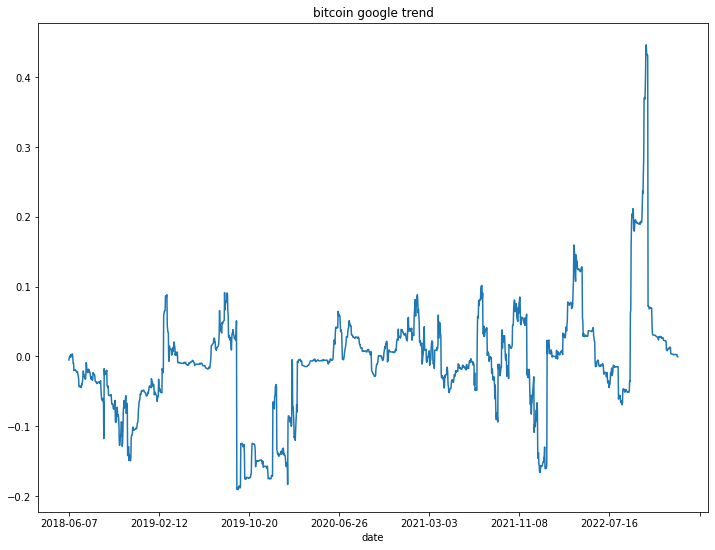

In [ ]:
import matplotlib.pyplot as plt
df_btc = pd.read_csv(resultfile[0])
df_btc.set_index('date',inplace = True)
df_btc['bitcoin3lag_corr'].plot(figsize = (12,9),title = 'bitcoin google trend')

- no significance correlation

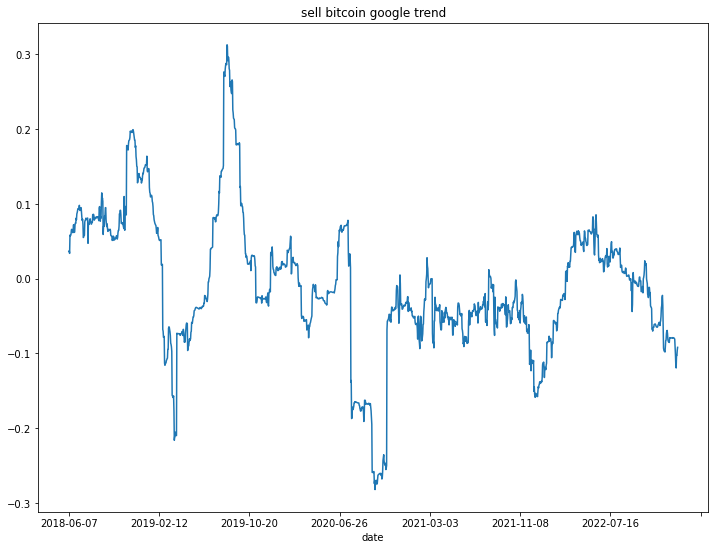

In [ ]:
df_sell = pd.read_csv(resultfile[1])
df_sell.set_index('date',inplace = True)
df_sell['bitcoin_corr'].plot(figsize = (12,9),title = 'sell bitcoin google trend')

- show some significance between covid google trend and bitcoin in bitcoin 3 days lagging

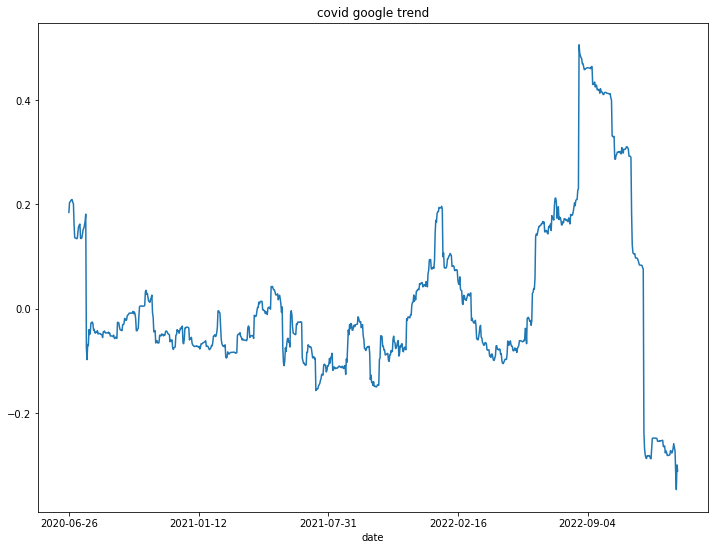

In [ ]:
df_cov = pd.read_csv(resultfile[2])
df_cov.set_index('date',inplace = True)
df_cov['bitcoin3lag_corr'].plot(figsize = (12,9),title = 'covid google trend')

- no significant correlation

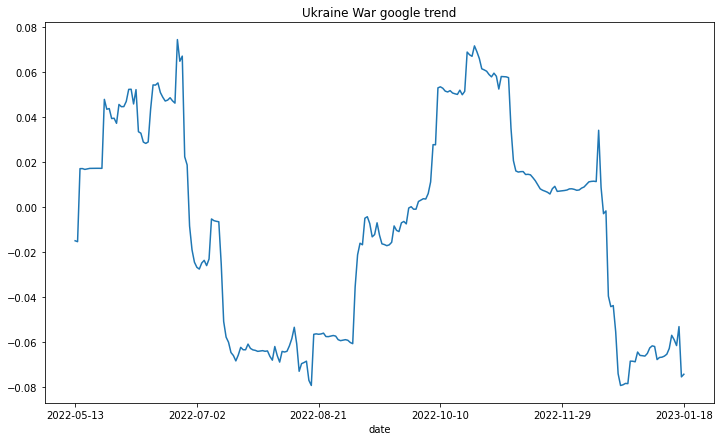

In [ ]:
df_war = pd.read_csv(resultfile[3])
df_war.set_index('date',inplace = True)
df_war['bitcoin_corr'].plot(figsize = (12,7),title = 'Ukraine War google trend')

- no significant correlation

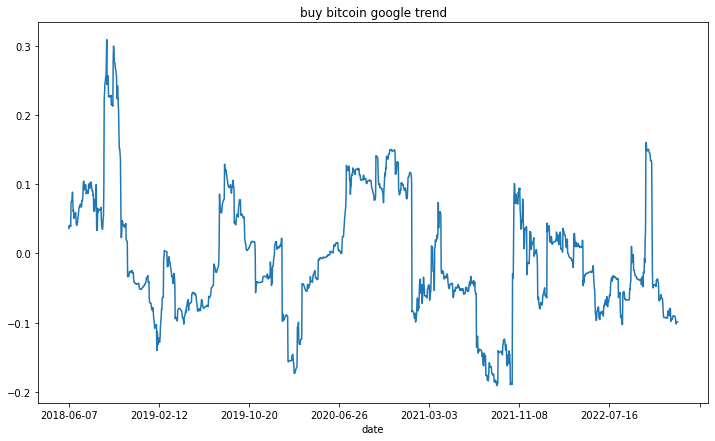

In [ ]:
df_b = pd.read_csv(resultfile[4])
df_b.set_index('date',inplace = True)
df_b['bitcoin3lag_corr'].plot(figsize = (12,7),title = 'buy bitcoin google trend')

- show some significance between ether google trend and bitcoin

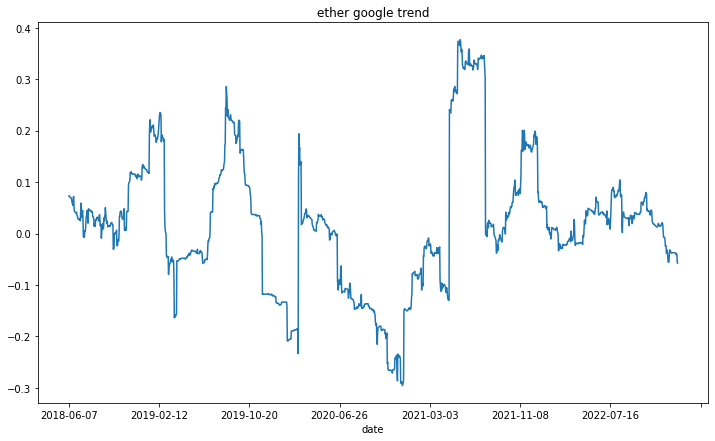

In [ ]:
df_ether = pd.read_csv(resultfile[5])
df_ether.set_index('date',inplace = True)
df_ether['bitcoin_corr'].plot(figsize = (12,7),title = 'ether google trend')

In [ ]:
# df_twitter = pd.read_csv('/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/Twitter Analysis/tweets_sentiment_and_volume.csv')
# dfp = df_twitter[['date','positive']]
# dfp.set_index('date',drop = True,inplace= True)
# dfp.to_csv('/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/tweets_pos_sentiment_v2.csv')
# dfn = df_twitter[['date','negative']]
# dfn.set_index('date',drop = True,inplace= True)
# dfn.to_csv('/content/drive/MyDrive/S&P Crypto Project/Market Sentiment Data/tweets_neg_sentiment_v2.csv')